#**Financial Analysis of the Indian Banking Sector through Python and Machine Learning**

# Executive Summary

This project analyzes major Indian banking stocks using traditional financial metrics such as returns, volatility, Sharpe ratios and valuation multiples.

Python is used to automate data collection and analysis, while machine learning techniques are applied only to support insights related to behavioral regimes and market efficiency.

Key findings indicate that ICICI Bank delivered superior risk-adjusted returns,
SBI appeared undervalued relative to profitability, and short-term return predictability remains limited, consistent with efficient market behavior.


# Dataset Description

**Dataset:** Indian Banking Sector Stock Data            
**Source:** Yahoo Finance (via yfinance Python library)              
**URL:** https://finance.yahoo.com                   
**Size:** Daily observations across multiple years for selected major Indian banks              
**Domain:** Financial Markets: Equity and Banking Sector Analysis         
**Region:** India              
**Time Period:** Multi-year historical data (covering different market conditions)

# Key Components

**Price Data:**

*   Daily Adjusted Closing Prices
*   Used to compute returns, volatility, and trend indicators
*   Adjusted prices account for dividends and stock splits to reflect true investor returns

**Return and Risk Metrics:**

*  Daily and annualized returns
*  Volatility (risk) measures
*  Risk-adjusted performance metrics (e.g., Sharpe Ratio)

**Valuation and Profitability Metrics: **

*   Price-to-Book (P/B) Ratio
*   Price-to-Earnings (P/E) Ratio
*   Return on Equity (ROE)

**Derived Financial Indicators:**

*   Short-term and medium-term return measures
*   Volatility-based indicators
*   Moving averages to capture trend behavior

**Machine Learning Inputs:**

*   Financial indicators derived from historical price data
*   Used for behavioral pattern analysis and return predictability assessment


# Introduction : Data Setup and Environment

This section sets up the Python environment and imports the libraries required for financial analysis, data handling and visualization.

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

print("All libraries imported successfully!")

All libraries imported successfully!


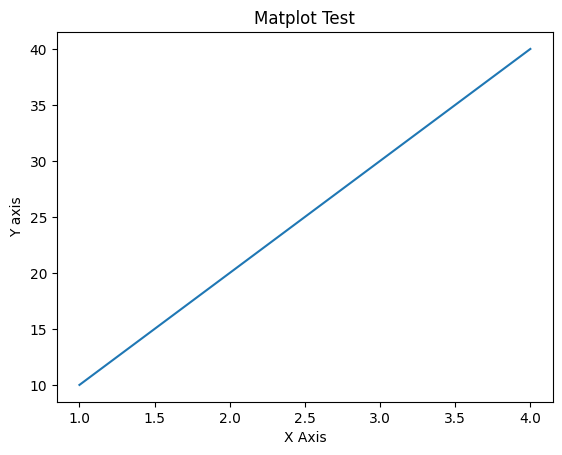

In [ ]:
x = [1, 2, 3, 4]
y = [10,20,30,40]

plt.plot(x,y)
plt.title("Matplot Test")
plt.xlabel("X Axis")
plt.ylabel("Y axis")
plt.show()

In [ ]:
sample_data = np.array([[1,2], [3,4], [5,6]])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(sample_data)

print(scaled_data)

[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


# Section 1: Data Collection and Basic visualization


This section collects historical price data for major Indian banking stocks using adjusted closing prices.                                               
Adjusted closing prices reflect true investor returns by accounting for dividends and stock splits, making them suitable for return and risk calculations in financial analysis.

In [ ]:
Banks = [
  'HDFCBANK.NS',
  'ICICIBANK.NS',
  'AXISBANK.NS',
  'KOTAKBANK.NS',
  'SBIN.NS'
]


In [ ]:
import yfinance as yf

price_data = yf.download(
    Banks,
    start='2020-04-01',
    end='2025-03-31',
    auto_adjust=False
)

price_data.head()

[*********************100%***********************]  5 of 5 completed


Price        Adj Close                                                    \
Ticker     AXISBANK.NS HDFCBANK.NS ICICIBANK.NS KOTAKBANK.NS     SBIN.NS   
Date                                                                       
2020-04-01  357.158722  392.912140   300.940430  1176.734009  172.132797   
2020-04-03  324.096771  385.429443   277.244263  1136.103516  161.936768   
2020-04-07  387.233154  424.382019   315.399872  1193.065796  171.994385   
2020-04-08  389.722778  420.972260   308.484467  1182.708984  168.857132   
2020-04-09  418.403015  438.092407   331.455200  1267.604248  173.240036   

Price            Close                                                    ...  \
Ticker     AXISBANK.NS HDFCBANK.NS ICICIBANK.NS KOTAKBANK.NS     SBIN.NS  ...   
Date                                                                      ...   
2020-04-01  358.649994  414.825012   311.149994  1181.650024  186.550003  ...   
2020-04-03  325.450012  406.924988   286.649994  1140.849976  175.500000  ...   
2020-04-07  388.850006  448.049988   326.100006  1198.050049  186.399994  ...   
2020-04-08  391.350006  444.450012   318.950012  1187.650024  183.000000  ...   
2020-04-09  420.149994  462.524994   342.700012  1272.900024  187.750000  ...   

Price             Open                                                    \
Ticker     AXISBANK.NS HDFCBANK.NS ICICIBANK.NS KOTAKBANK.NS     SBIN.NS   
Date                                                                       
2020-04-01  376.250000  431.924988   319.000000  1294.900024  194.000000   
2020-04-03  360.200012  421.500000   309.500000  1181.650024  187.550003   
2020-04-07  347.399994  437.000000   308.299988  1221.000000  184.399994   
2020-04-08  383.750000  439.975006   322.850006  1184.800049  182.899994   
2020-04-09  405.000000  456.500000   332.399994  1215.000000  188.000000   

Price           Volume                                                  
Ticker     AXISBANK.NS HDFCBANK.NS ICICIBANK.NS KOTAKBANK.NS   SBIN.NS  
Date                                                                    
2020-04-01    27744593    29103504     33141186     10838462  52954239  
2020-04-03    41317365    34996280     57326314     10111471  64448494  
2020-04-07    48093237    60412638     57661076      8552570  72130500  
2020-04-08    64930598    56219352     73931321      7405087  80435759  
2020-04-09    44090546    44457146     52431174      8097402  62416005  

[5 rows x 30 columns]

In [ ]:
adj_close = price_data['Adj Close']
adj_close.head()

Ticker,AXISBANK.NS,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS,SBIN.NS
Date,,,,,
2020-04-01,357.158722,392.912140,300.940430,1176.734009,172.132797
2020-04-03,324.096771,385.429443,277.244263,1136.103516,161.936768
2020-04-07,387.233154,424.382019,315.399872,1193.065796,171.994385
2020-04-08,389.722778,420.972260,308.484467,1182.708984,168.857132
2020-04-09,418.403015,438.092407,331.455200,1267.604248,173.240036


In [ ]:
adj_close.shape

(1237, 5)

In [ ]:
adj_close.isna().sum()
adj_close = adj_close.dropna()
adj_close.head()

Ticker,AXISBANK.NS,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS,SBIN.NS
Date,,,,,
2020-04-01,357.158722,392.912140,300.940430,1176.734009,172.132797
2020-04-03,324.096771,385.429443,277.244263,1136.103516,161.936768
2020-04-07,387.233154,424.382019,315.399872,1193.065796,171.994385
2020-04-08,389.722778,420.972260,308.484467,1182.708984,168.857132
2020-04-09,418.403015,438.092407,331.455200,1267.604248,173.240036


In [ ]:
adj_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1237 entries, 2020-04-01 to 2025-03-28
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AXISBANK.NS   1237 non-null   float64
 1   HDFCBANK.NS   1237 non-null   float64
 2   ICICIBANK.NS  1237 non-null   float64
 3   KOTAKBANK.NS  1237 non-null   float64
 4   SBIN.NS       1237 non-null   float64
dtypes: float64(5)
memory usage: 58.0 KB


<function matplotlib.pyplot.show(close=None, block=None)>

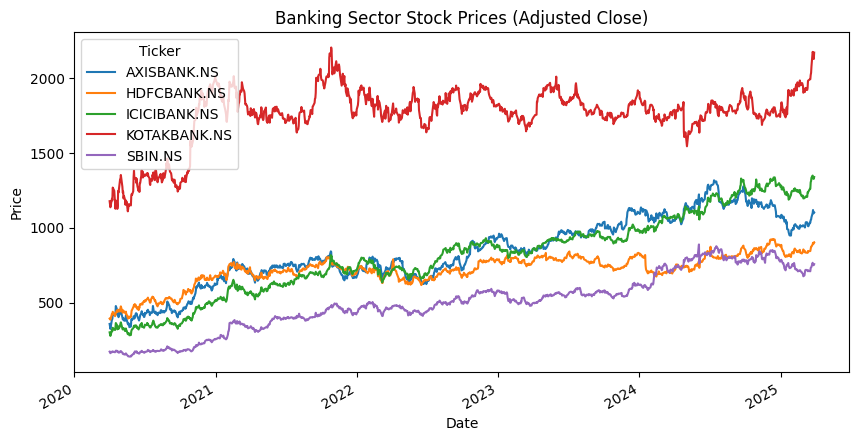

In [ ]:
adj_close.plot(figsize=(10,5))
plt.title("Banking Sector Stock Prices (Adjusted Close)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show

# Section 2: Risk & Returns Analysis

This section calculates daily and annual returns, volatility and Sharpe ratios to evaluate the performance of banking stocks on a risk-adjusted basis.    
Returns alone do not capture investment quality hence Risk-adjusted metrics such as volatility and Sharpe ratio provide a more realistic comparison of performance across banks.

In [ ]:
daily_returns = adj_close.pct_change()
daily_returns.head()

Ticker,AXISBANK.NS,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS,SBIN.NS
Date,,,,,
2020-04-01,NaN,NaN,NaN,NaN,NaN
2020-04-03,-0.092569,-0.019044,-0.078740,-0.034528,-0.059234
2020-04-07,0.194807,0.101063,0.137625,0.050138,0.062108
2020-04-08,0.006429,-0.008035,-0.021926,-0.008681,-0.018240
2020-04-09,0.073591,0.040668,0.074463,0.071780,0.025956


In [ ]:
daily_returns = daily_returns.dropna()
daily_returns.head()

Ticker,AXISBANK.NS,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS,SBIN.NS
Date,,,,,
2020-04-03,-0.092569,-0.019044,-0.078740,-0.034528,-0.059234
2020-04-07,0.194807,0.101063,0.137625,0.050138,0.062108
2020-04-08,0.006429,-0.008035,-0.021926,-0.008681,-0.018240
2020-04-09,0.073591,0.040668,0.074463,0.071780,0.025956
2020-04-13,-0.002856,-0.032106,-0.035162,-0.017283,-0.022636


In [ ]:
annual_returns = daily_returns.mean() * 252
annual_returns

,0
Ticker,
AXISBANK.NS,0.282052
HDFCBANK.NS,0.199820
ICICIBANK.NS,0.345391
KOTAKBANK.NS,0.160505
SBIN.NS,0.346773


In [ ]:
volatility = daily_returns.std() * np.sqrt(252)
volatility

,0
Ticker,
AXISBANK.NS,0.325929
HDFCBANK.NS,0.246778
ICICIBANK.NS,0.287329
KOTAKBANK.NS,0.268327
SBIN.NS,0.299425


In [ ]:
risk_return_table = pd.DataFrame({
    'Annual Return': annual_returns,
    'Volatility (Risk)': volatility
})

risk_return_table

,Annual Return,Volatility (Risk)
Ticker,,
AXISBANK.NS,0.282052,0.325929
HDFCBANK.NS,0.199820,0.246778
ICICIBANK.NS,0.345391,0.287329
KOTAKBANK.NS,0.160505,0.268327
SBIN.NS,0.346773,0.299425


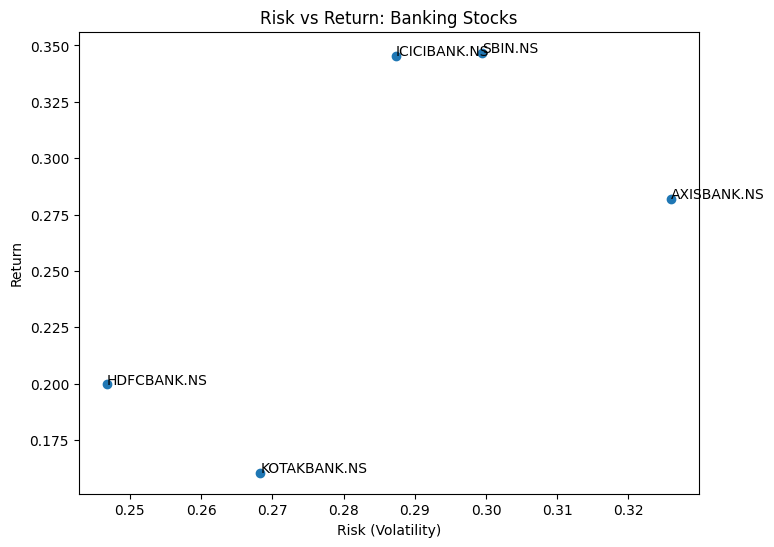

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    risk_return_table['Volatility (Risk)'],
    risk_return_table['Annual Return']
)

for bank in risk_return_table.index:
    plt.text(
        risk_return_table.loc[bank, 'Volatility (Risk)'],
        risk_return_table.loc[bank, 'Annual Return'],
        bank
    )

plt.xlabel("Risk (Volatility)")
plt.ylabel("Return")
plt.title("Risk vs Return: Banking Stocks")
plt.show()

In [ ]:
risk_free_rate = 0.06

sharpe_ratio = (annual_returns - risk_free_rate) / volatility
sharpe_ratio

risk_return_table['Sharpe Ratio'] = sharpe_ratio
risk_return_table

,Annual Return,Volatility (Risk),Sharpe Ratio
Ticker,,,
AXISBANK.NS,0.282052,0.325929,0.681291
HDFCBANK.NS,0.199820,0.246778,0.566584
ICICIBANK.NS,0.345391,0.287329,0.993254
KOTAKBANK.NS,0.160505,0.268327,0.374561
SBIN.NS,0.346773,0.299425,0.957745


In [ ]:
risk_return_table.sort_values(by='Sharpe Ratio', ascending=False)

,Annual Return,Volatility (Risk),Sharpe Ratio
Ticker,,,
ICICIBANK.NS,0.345391,0.287329,0.993254
SBIN.NS,0.346773,0.299425,0.957745
AXISBANK.NS,0.282052,0.325929,0.681291
HDFCBANK.NS,0.199820,0.246778,0.566584
KOTAKBANK.NS,0.160505,0.268327,0.374561


#Section 3: Valuation Metrics and Profitability Comparison

This section compares banks using valuation and profitability metrics such as Price-to-Book ratio, Price-to-Earnings ratio and Return on Equity Ratio.     
Although Banks are primarily valued based on their book value and profitability. Comparing valuation multiples with ROE helps explain why certain banks trade at a premium or discount.

In [ ]:
bank_tickers = {
    'HDFCBANK.NS': 'HDFC Bank',
    'ICICIBANK.NS': 'ICICI Bank',
    'AXISBANK.NS': 'Axis Bank',
    'KOTAKBANK.NS': 'Kotak Bank',
    'SBIN.NS': 'SBI'
}

In [ ]:
valuation_data = []

for ticker, name in bank_tickers.items():
    info = yf.Ticker(ticker).info

    valuation_data.append({
        'Bank': name,
        'P/B Ratio': info.get('priceToBook'),
        'P/E Ratio': info.get('trailingPE'),
        'ROE': info.get('returnOnEquity')
    })

valuation_df = pd.DataFrame(valuation_data)
valuation_df

,Bank,P/B Ratio,P/E Ratio,ROE
0,HDFC Bank,2.783277,22.520567,0.10843
1,ICICI Bank,2.883211,18.315973,0.17599
2,Axis Bank,1.913056,14.750090,0.14004
3,Kotak Bank,2.555576,23.093786,0.11780
4,SBI,1.589422,10.905551,0.15676


In [ ]:
valuation_df.set_index('Bank', inplace=True)
valuation_df

,P/B Ratio,P/E Ratio,ROE
Bank,,,
HDFC Bank,2.783277,22.520567,0.10843
ICICI Bank,2.883211,18.315973,0.17599
Axis Bank,1.913056,14.750090,0.14004
Kotak Bank,2.555576,23.093786,0.11780
SBI,1.589422,10.905551,0.15676


#Section 4: Data Preparation for Machine Learning

In this section the financial data was transformed into a structured format that models can work with.       
Price data was converted into indicators such as recent returns, volatility, and trend measures. These indicators capture short-term behavior and are commonly used to analyze price dynamics.

In [ ]:
returns = adj_close.pct_change().dropna()
returns.head()

Ticker,AXISBANK.NS,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS,SBIN.NS
Date,,,,,
2020-04-03,-0.092569,-0.019044,-0.078740,-0.034528,-0.059234
2020-04-07,0.194807,0.101063,0.137625,0.050138,0.062108
2020-04-08,0.006429,-0.008035,-0.021926,-0.008681,-0.018240
2020-04-09,0.073591,0.040668,0.074463,0.071780,0.025956
2020-04-13,-0.002856,-0.032106,-0.035162,-0.017283,-0.022636


In [ ]:
returns_long = returns.stack().reset_index()
returns_long.columns = ['Date', 'Ticker', 'Daily_Return']
returns_long.head()

features = returns_long.copy()
features.head()

,Date,Ticker,Daily_Return
0,2020-04-03,AXISBANK.NS,-0.092569
1,2020-04-03,HDFCBANK.NS,-0.019044
2,2020-04-03,ICICIBANK.NS,-0.078740
3,2020-04-03,KOTAKBANK.NS,-0.034528
4,2020-04-03,SBIN.NS,-0.059234


In [ ]:
features['Return_1M'] = (
    features.groupby('Ticker')['Daily_Return']
    .rolling(21)
    .mean()
    .reset_index(level=0, drop=True)
)

features['Return_3M'] = (
    features.groupby('Ticker')['Daily_Return']
    .rolling(63)
    .mean()
    .reset_index(level=0, drop=True)
)

features['Volatility_1M'] = (
    features.groupby('Ticker')['Daily_Return']
    .rolling(21)
    .std()
    .reset_index(level=0, drop=True)
)

prices_long = adj_close.stack().reset_index()
prices_long.columns = ['Date', 'Ticker', 'Adj_Close']

features = features.merge(prices_long, on=['Date', 'Ticker'])
features.head()

,Date,Ticker,Daily_Return,Return_1M,Return_3M,Volatility_1M,Adj_Close
0,2020-04-03,AXISBANK.NS,-0.092569,NaN,NaN,NaN,324.096771
1,2020-04-03,HDFCBANK.NS,-0.019044,NaN,NaN,NaN,385.429443
2,2020-04-03,ICICIBANK.NS,-0.078740,NaN,NaN,NaN,277.244263
3,2020-04-03,KOTAKBANK.NS,-0.034528,NaN,NaN,NaN,1136.103516
4,2020-04-03,SBIN.NS,-0.059234,NaN,NaN,NaN,161.936768


In [ ]:
features['MA_20'] = (
    features.groupby('Ticker')['Adj_Close']
    .rolling(20)
    .mean()
    .reset_index(level=0, drop=True)
)

features['MA_50'] = (
    features.groupby('Ticker')['Adj_Close']
    .rolling(50)
    .mean()
    .reset_index(level=0, drop=True)
)

future_return = (
    features.groupby('Ticker')['Daily_Return']
    .shift(-21)
)

features['Target'] = (future_return > 0).astype(int)


In [ ]:
features_clean = features.dropna()
features_clean.head()

,Date,Ticker,Daily_Return,Return_1M,Return_3M,Volatility_1M,Adj_Close,MA_20,MA_50,Target
310,2020-07-07,AXISBANK.NS,0.030760,0.002324,0.004787,0.031325,445.489929,416.003035,402.184728,1
311,2020-07-07,HDFCBANK.NS,0.001949,0.004228,0.005003,0.021084,523.385559,490.228517,460.605833,0
312,2020-07-07,ICICIBANK.NS,0.039243,0.002516,0.003950,0.029142,363.710876,342.505293,330.454138,1
313,2020-07-07,KOTAKBANK.NS,0.000256,0.001377,0.002836,0.023743,1362.557617,1325.056775,1271.090703,1
314,2020-07-07,SBIN.NS,0.002925,0.000746,0.000611,0.024538,174.024353,168.469594,161.254875,0


In [ ]:
X = features_clean.drop(columns=['Date', 'Ticker', 'Target'])
y = features_clean['Target']

split_index = int(len(features_clean) * 0.7)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Section 5: Identifying Behavioral Patterns Using Unsupervised Learning

This section analyzes patterns in banking stock behavior using unsupervised machine learning techniques.                                   
By grouping observations based on return, volatility and trend characteristics, the analysis highlights different behavioral patterns that emerge over time, Rather than classifying individual banks, this approach helps understand how banking stocks move through periods of stability, transition, and higher risk under varying market conditions.

In [ ]:
cluster_features = features_clean[
    ['Return_1M', 'Return_3M', 'Volatility_1M', 'MA_20', 'MA_50']
]

cluster_features.head()

,Return_1M,Return_3M,Volatility_1M,MA_20,MA_50
310,0.002324,0.004787,0.031325,416.003035,402.184728
311,0.004228,0.005003,0.021084,490.228517,460.605833
312,0.002516,0.003950,0.029142,342.505293,330.454138
313,0.001377,0.002836,0.023743,1325.056775,1271.090703
314,0.000746,0.000611,0.024538,168.469594,161.254875


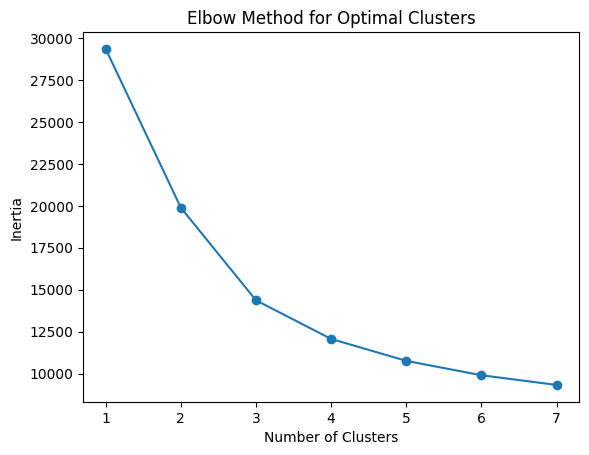

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_features)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 8), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(cluster_scaled)

features_clean['Cluster'] = clusters
features_clean[['Ticker', 'Cluster']].head()

features_clean.groupby(['Ticker', 'Cluster']).size()

cluster_summary = features_clean.groupby('Cluster')[
    ['Return_1M', 'Return_3M', 'Volatility_1M']
].mean()

cluster_summary

/tmp/ipython-input-2889351149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_clean['Cluster'] = clusters


,Return_1M,Return_3M,Volatility_1M
Cluster,,,
0,0.000251,0.000424,0.014566
1,0.000022,0.000417,0.013238
2,0.004147,0.003038,0.022051


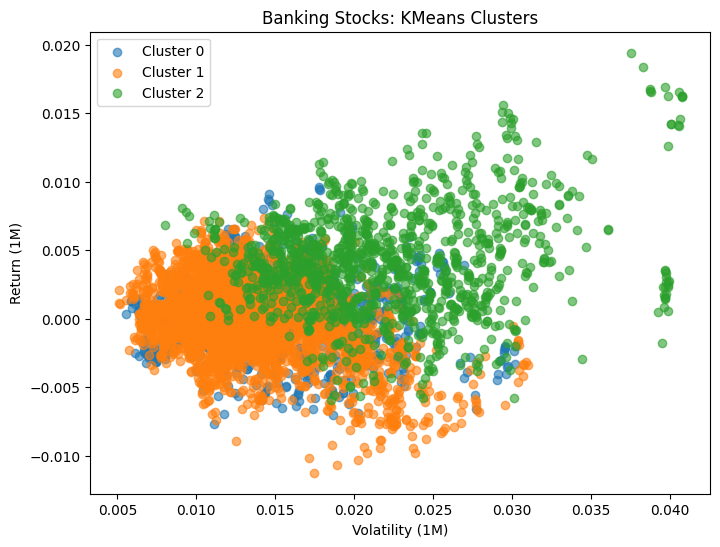

In [ ]:
plt.figure(figsize=(8,6))

for cluster in sorted(features_clean['Cluster'].unique()):
    subset = features_clean[features_clean['Cluster'] == cluster]
    plt.scatter(
        subset['Volatility_1M'],
        subset['Return_1M'],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

plt.xlabel('Volatility (1M)')
plt.ylabel('Return (1M)')
plt.title('Banking Stocks: KMeans Clusters')
plt.legend()
plt.show()


# Section 6: Evaluation of Short Term Return Predictability

This section evaluates whether short-term movements in banking stock returns can be explained using historical financial indicators.            
Machine learning models were applied to assess whether patterns in past returns, volatility and trends translate into reliable signals about future price direction.                              
The focus of this analysis is not on building a trading strategy but on understanding the extent to which banking stock returns are predictable in the short term.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.5059625212947189
[[139 751]
 [119 752]]
              precision    recall  f1-score   support

           0       0.54      0.16      0.24       890
           1       0.50      0.86      0.63       871

    accuracy                           0.51      1761
   macro avg       0.52      0.51      0.44      1761
weighted avg       0.52      0.51      0.44      1761



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.49744463373083475
[[153 737]
 [148 723]]
              precision    recall  f1-score   support

           0       0.51      0.17      0.26       890
           1       0.50      0.83      0.62       871

    accuracy                           0.50      1761
   macro avg       0.50      0.50      0.44      1761
weighted avg       0.50      0.50      0.44      1761



In [ ]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


,0
Daily_Return,0.200372
Return_1M,0.158933
Adj_Close,0.143410
Return_3M,0.133918
MA_20,0.130214
Volatility_1M,0.118750
MA_50,0.114403


# Section 7: Model Evaluation and Consolidated Results

This section presents the final outputs from the machine learning analysis including model performance comparison, classification diagnostics, feature importance and clustering results.                          
The purpose of this section is to evaluate how different models perform on the same dataset and to understand where predictions succeed or fail and summarize how banking stocks are distributed across the identified behavioral patterns.                          
These results provide transparency into the strengths and limitations of the models and help interpret the role of different financial indicators in the analysis.

In [ ]:
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf)
    ]
})

model_comparison


,Model,Accuracy
0,Logistic Regression,0.505963
1,Random Forest,0.497445


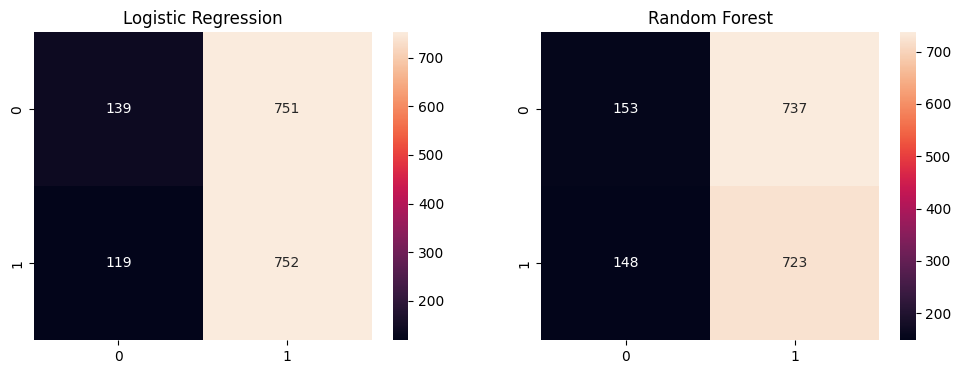

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(confusion_matrix(y_test, y_pred_log),
            annot=True, fmt='d', ax=axes[0])
axes[0].set_title('Logistic Regression')

sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True, fmt='d', ax=axes[1])
axes[1].set_title('Random Forest')

plt.show()


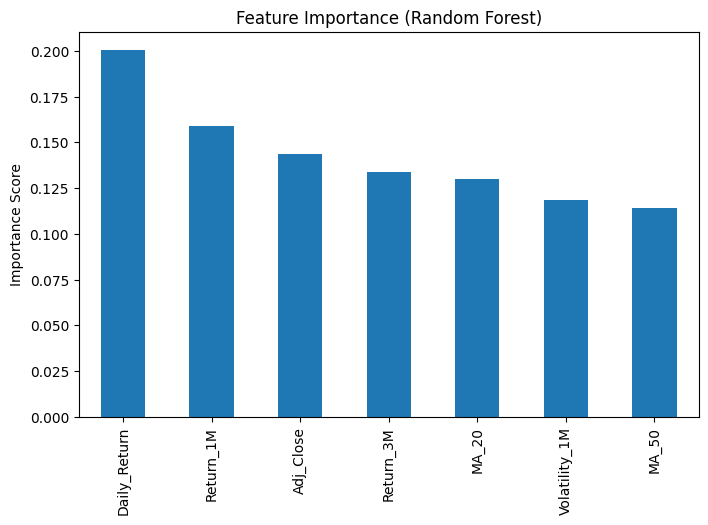

In [ ]:
plt.figure(figsize=(8,5))
feature_importance.plot(kind='bar')
plt.title('Feature Importance (Random Forest)')
plt.ylabel('Importance Score')
plt.show()


In [ ]:
cluster_distribution = (
    features_clean
    .groupby(['Ticker', 'Cluster'])
    .size()
    .unstack(fill_value=0)
)

cluster_distribution


Cluster,0,1,2
Ticker,,,
AXISBANK.NS,0,863,311
HDFCBANK.NS,0,1016,158
ICICIBANK.NS,0,901,273
KOTAKBANK.NS,1150,0,24
SBIN.NS,0,713,461


In [ ]:
final_cluster_summary = features_clean.groupby('Cluster')[
    ['Return_1M', 'Return_3M', 'Volatility_1M']
].mean()

final_cluster_summary


,Return_1M,Return_3M,Volatility_1M
Cluster,,,
0,0.000251,0.000424,0.014566
1,0.000022,0.000417,0.013238
2,0.004147,0.003038,0.022051


In [ ]:
features_clean.to_csv('final_ml_dataset.csv', index=False)
model_comparison.to_csv('model_comparison.csv', index=False)
final_cluster_summary.to_csv('cluster_summary.csv')

In [ ]:
print("Final dataset shape:", features_clean.shape)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Final dataset shape: (5870, 11)
Train size: (4109, 7)
Test size: (1761, 7)


# **Limitations**

This analysis is based primarily on historical price data and publicly available financial metrics and does not incorporate macroeconomic variables such as interest rate movements, inflation, or regulatory changes that can significantly impact banking stocks.

Additionally, while machine learning techniques were used to explore behavioral patterns and test predictability, their effectiveness is inherently limited by market efficiency, particularly in short-term return forecasting.

As a result, the findings should be interpreted as analytical insights rather than actionable trading signals.

# **Closing Remarks & Key Takeaways**

**Financial Insights:**            
The analysis highlights meaningful differences in risk-adjusted performance and valuation across major Indian banking stocks. Metrics such as volatility, Sharpe ratio and ROE help explain why certain banks command valuation premiums while others trade at discounts.

**Behavioral Patterns:**                
Machine learning-based analysis revealed distinct risk - return regimes within the banking sector, indicating that banks transition between stable, transitional and higher-risk phases depending on market conditions rather than exhibiting static behavior.

**Predictability Assessment:**                  
The supervised learning results indicate limited short-term return predictability, reinforcing the idea that banking stocks largely reflect available information in prices, consistent with efficient market behavior.